In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

   State      Hit    Stand
0      0 -0.22759 -0.61534
1      1 -0.23583 -0.64231
2      2 -0.49531 -0.53598
3      3 -0.38639 -0.86990
4      4 -0.61015 -0.31751


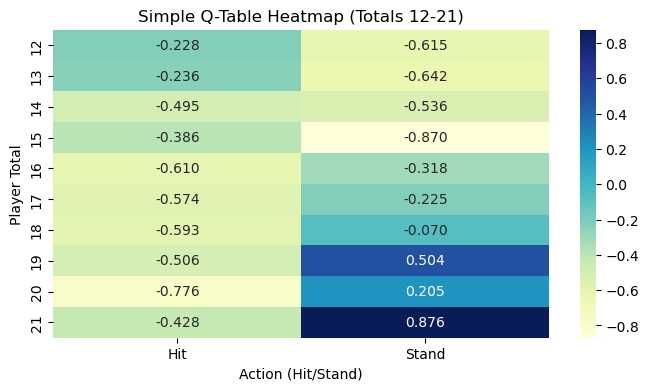

In [4]:
# -----------------------------
# 1. Load and analyze the simple Q-table (qtable1.csv)
# -----------------------------
qtable1 = pd.read_csv("qtable1.csv")
print(qtable1.head())

# Plot a heatmap of Q-values for HIT and STAND across totals 12-21.
# We assume qtable1.csv has columns: "State", "Hit", "Stand"
qtable1.set_index("State", inplace=True)
plt.figure(figsize=(8, 4))
sns.heatmap(qtable1, annot=True, cmap="YlGnBu", fmt=".3f", yticklabels=range(12, 22))
plt.title("Simple Q-Table Heatmap (Totals 12-21)")
plt.xlabel("Action (Hit/Stand)")
plt.ylabel("Player Total")
plt.show()

   Episode  AverageReward
0    10000       -0.12100
1    20000       -0.12410
2    30000       -0.12620
3    40000       -0.11958
4    50000       -0.12000


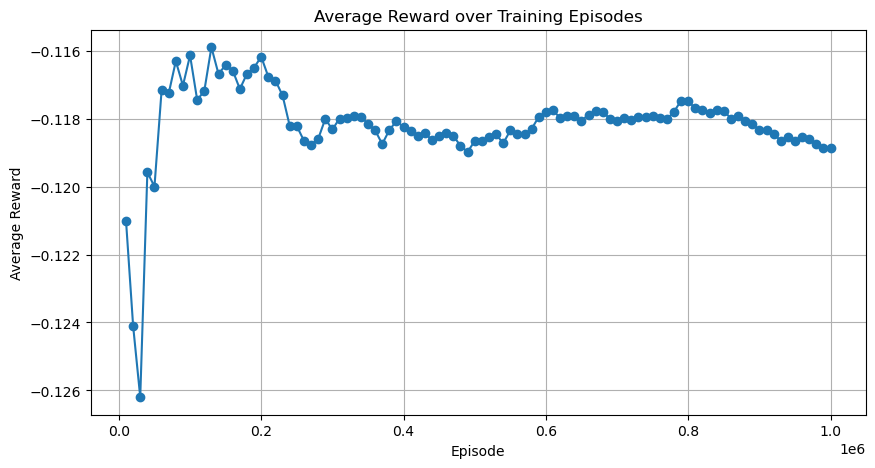

In [5]:
# -----------------------------
# 2. Load and analyze performance metrics
# -----------------------------
perf = pd.read_csv("performance_metrics1.csv")
print(perf.head())

plt.figure(figsize=(10, 5))
plt.plot(perf["Episode"], perf["AverageReward"], marker="o", linestyle="-")
plt.title("Average Reward over Training Episodes")
plt.xlabel("Episode")
plt.ylabel("Average Reward")
plt.grid(True)
plt.show()

   Episode  AverageReward
0    10000       -0.12120
1    20000       -0.10615
2    30000       -0.10240
3    40000       -0.09888
4    50000       -0.09528


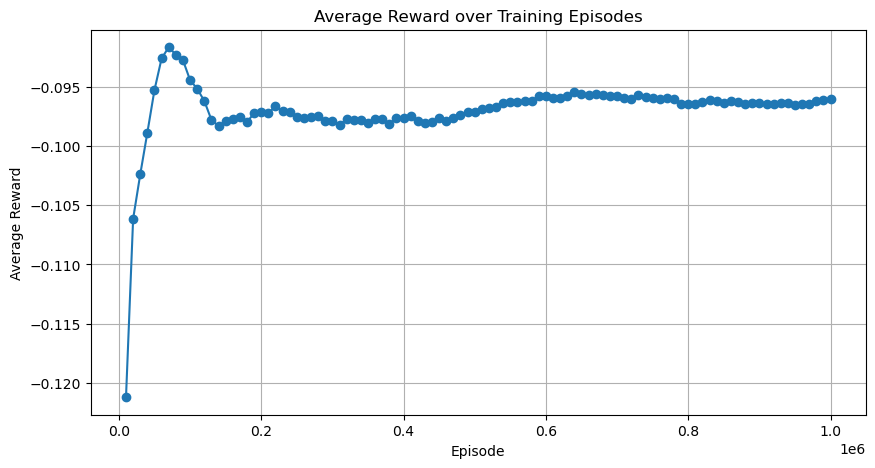

In [11]:
# -----------------------------
# 2. Load and analyze performance metrics
# -----------------------------
perf = pd.read_csv("performance_metrics2.csv")
print(perf.head())

plt.figure(figsize=(10, 5))
plt.plot(perf["Episode"], perf["AverageReward"], marker="o", linestyle="-")
plt.title("Average Reward over Training Episodes")
plt.xlabel("Episode")
plt.ylabel("Average Reward")
plt.grid(True)
plt.show()

   PlayerTotal  ActiveAce  DealerCard      Hit    Stand
0           12          0           2 -0.24908 -0.38010
1           12          0           3 -0.31159 -0.48934
2           12          0           4 -0.18178 -0.37509
3           12          0           5  0.03917 -0.62153
4           12          0           6 -0.32950 -0.40555


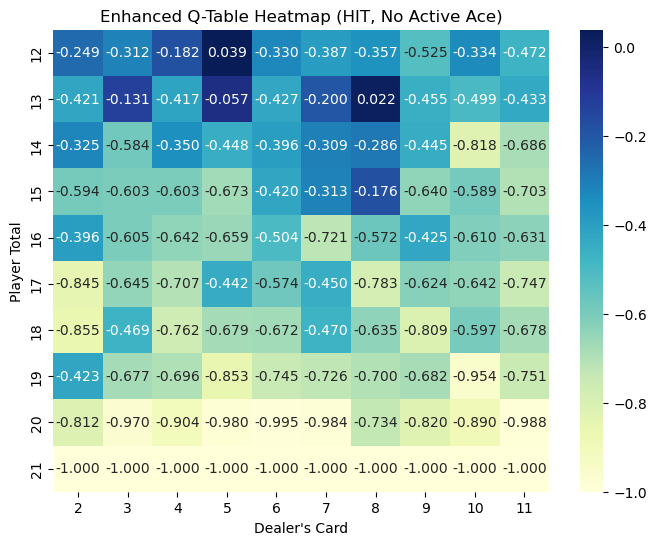

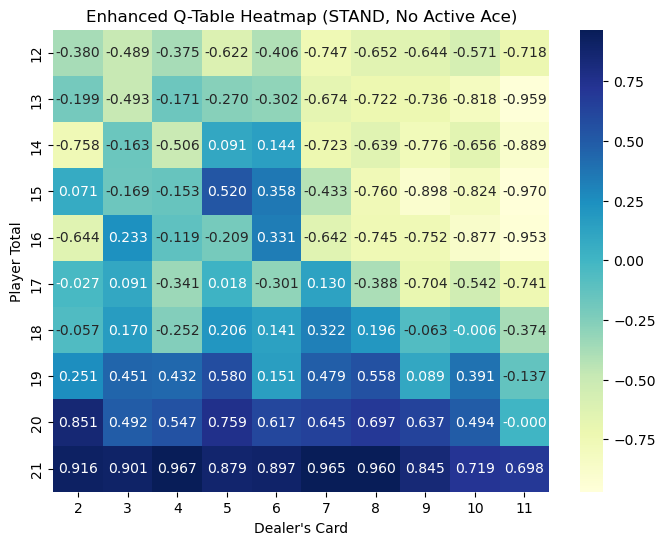

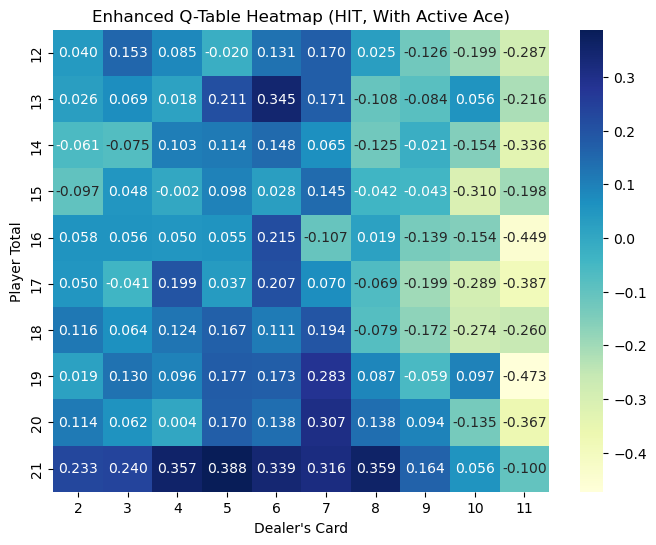

In [ ]:
# -----------------------------
# 3. Analyzing enhanced Q-table (qtable2.csv)
# -----------------------------
# For qtable2.csv, assume the columns are: PlayerTotal, ActiveAce, DealerCard, Hit, Stand
qtable2 = pd.read_csv("qtable2.csv")
print(qtable2.head())

# Create pivot tables to visualize Q-values as heatmaps.
# For example, fix ActiveAce = 0 and plot for different dealer cards and player totals for action HIT.
qtable2_hit_noace = qtable2[qtable2["ActiveAce"] == 0].pivot(index="PlayerTotal", columns="DealerCard", values="Hit")
plt.figure(figsize=(8, 6))
sns.heatmap(qtable2_hit_noace, annot=True, cmap="YlGnBu", fmt=".3f")
plt.title("Enhanced Q-Table Heatmap (HIT, No Active Ace)")
plt.xlabel("Dealer's Card")
plt.ylabel("Player Total")
plt.show()

# Similarly, plot for STAND and/or for ActiveAce = 1.
qtable2_stand_noace = qtable2[qtable2["ActiveAce"] == 0].pivot(index="PlayerTotal", columns="DealerCard", values="Stand")
plt.figure(figsize=(8, 6))
sns.heatmap(qtable2_stand_noace, annot=True, cmap="YlGnBu", fmt=".3f")
plt.title("Enhanced Q-Table Heatmap (STAND, No Active Ace)")
plt.xlabel("Dealer's Card")
plt.ylabel("Player Total")
plt.show()

# Plot heatmaps for ActiveAce = 1 if desired.
qtable2_hit_ace = qtable2[qtable2["ActiveAce"] == 1].pivot(index="PlayerTotal", columns="DealerCard", values="Hit")
plt.figure(figsize=(8, 6))
sns.heatmap(qtable2_hit_ace, annot=True, cmap="YlGnBu", fmt=".3f")
plt.title("Enhanced Q-Table Heatmap (HIT, With Active Ace)")
plt.xlabel("Dealer's Card")
plt.ylabel("Player Total")
plt.show()

   State      Hit    Stand
0      0 -0.22759 -0.61534
1      1 -0.23583 -0.64231
2      2 -0.49531 -0.53598
3      3 -0.38639 -0.86990
4      4 -0.61015 -0.31751


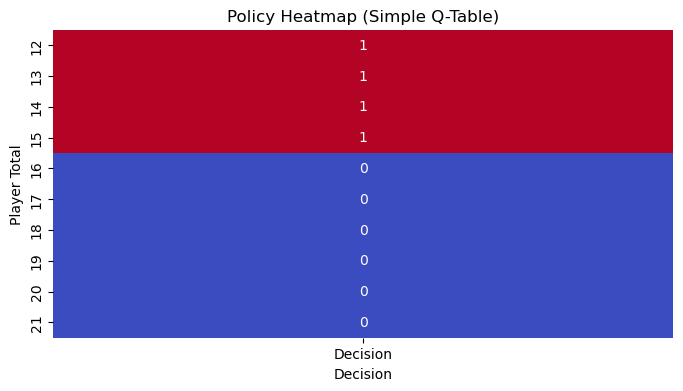

In [13]:
# -----------------------------
# 1. Analyze Simple Q-Table (qtable1.csv)
# -----------------------------
# Assume qtable1.csv has columns: "State", "Hit", "Stand"
qtable1 = pd.read_csv("qtable1.csv")
print(qtable1.head())

# We now convert the Q-values into a binary decision:
# If Q(HIT) > Q(STAND), decision = 1 (HIT); else decision = 0 (STAND)
qtable1["Decision"] = np.where(qtable1["Hit"] > qtable1["Stand"], 1, 0)

# Since we now use a proper state range 12-21, we assume that the "State" column actually contains player totals.
# If not, you can create a new column:
qtable1["Total"] = qtable1["State"] + 12 # or: qtable1.index + 12 if index was used.

# Create a heatmap for the policy: x-axis is a dummy column since we have one decision per state.
plt.figure(figsize=(8, 4))
# For a simple heatmap, we can reshape our data to a DataFrame with "Total" as the index.
policy_simple = qtable1.set_index("Total")[["Decision"]]
sns.heatmap(policy_simple, annot=True, cmap="coolwarm", cbar=False, 
            yticklabels=policy_simple.index)
plt.title("Policy Heatmap (Simple Q-Table)")
plt.xlabel("Decision")
plt.ylabel("Player Total")
plt.show()

   PlayerTotal  ActiveAce  DealerCard      Hit    Stand
0           12          0           2 -0.24908 -0.38010
1           12          0           3 -0.31159 -0.48934
2           12          0           4 -0.18178 -0.37509
3           12          0           5  0.03917 -0.62153
4           12          0           6 -0.32950 -0.40555


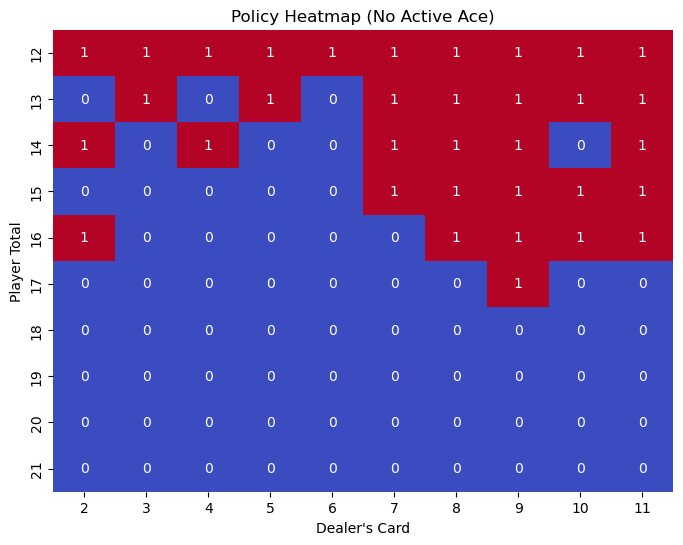

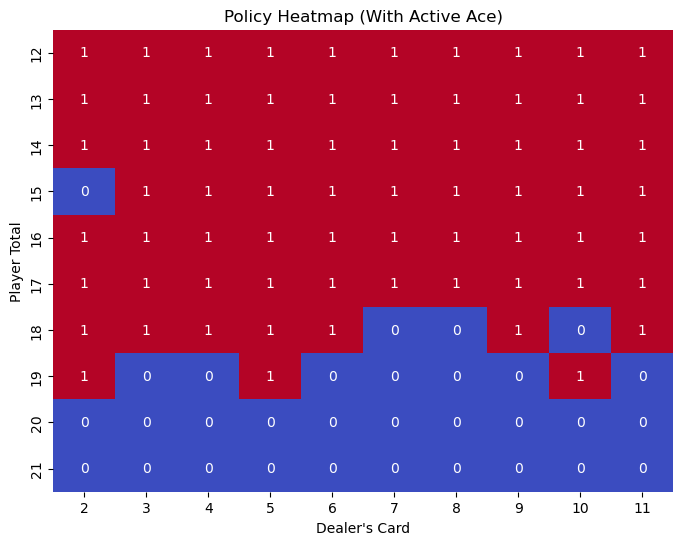

In [15]:
# -----------------------------
# 2. Analyze Enhanced Q-Table (qtable2.csv)
# -----------------------------
# Assume qtable2.csv has columns: "PlayerTotal", "ActiveAce", "DealerCard", "Hit", "Stand"
qtable2 = pd.read_csv("qtable2.csv")
print(qtable2.head())

# Compute the decision for each row: 1 if HIT is better, else 0.
qtable2["Decision"] = np.where(qtable2["Hit"] > qtable2["Stand"], 1, 0)

# Now we can create pivot tables for each value of ActiveAce.
# For ActiveAce = 0 (no active Ace):
policy_noace = qtable2[qtable2["ActiveAce"] == 0].pivot(index="PlayerTotal", columns="DealerCard", values="Decision")
plt.figure(figsize=(8, 6))
sns.heatmap(policy_noace, annot=True, cmap="coolwarm", cbar=False, fmt="d")
plt.title("Policy Heatmap (No Active Ace)")
plt.xlabel("Dealer's Card")
plt.ylabel("Player Total")
plt.show()

# For ActiveAce = 1 (with active Ace):
policy_ace = qtable2[qtable2["ActiveAce"] == 1].pivot(index="PlayerTotal", columns="DealerCard", values="Decision")
plt.figure(figsize=(8, 6))
sns.heatmap(policy_ace, annot=True, cmap="coolwarm", cbar=False, fmt="d")
plt.title("Policy Heatmap (With Active Ace)")
plt.xlabel("Dealer's Card")
plt.ylabel("Player Total")
plt.show()

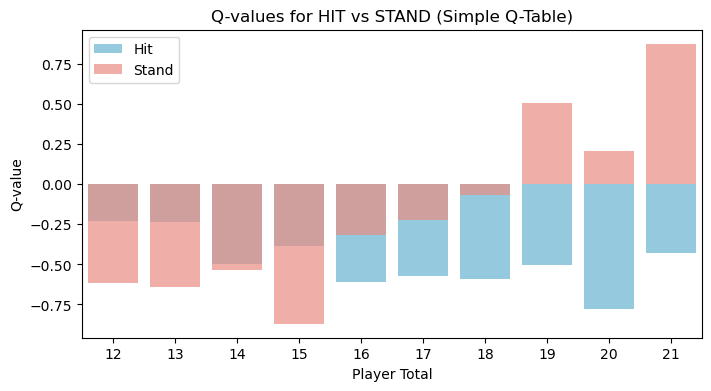

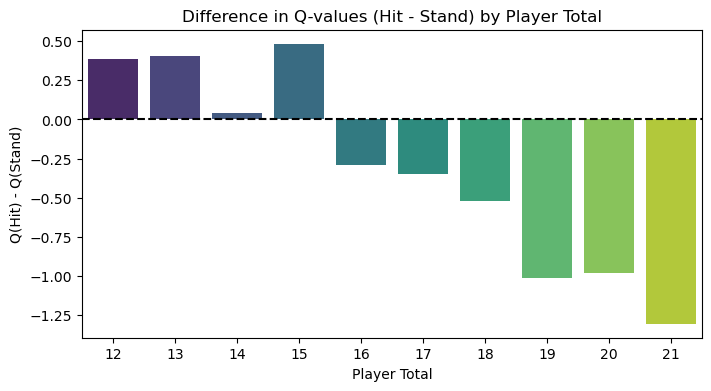

In [10]:
# Create a new column for the actual player totals (12 to 21)
qtable1["Total"] = qtable1.index + 12

# Plot the Q-values for HIT vs STAND using the Total column for the x-axis.
plt.figure(figsize=(8, 4))
sns.barplot(x="Total", y="Hit", data=qtable1, color="skyblue", label="Hit")
sns.barplot(x="Total", y="Stand", data=qtable1, color="salmon", label="Stand", alpha=0.7)
plt.title("Q-values for HIT vs STAND (Simple Q-Table)")
plt.xlabel("Player Total")
plt.ylabel("Q-value")
plt.legend()
plt.show()

# Plot the difference (Hit - Stand) using the Total column.
qtable1["Difference"] = qtable1["Hit"] - qtable1["Stand"]
plt.figure(figsize=(8, 4))
sns.barplot(x="Total", y="Difference", data=qtable1, palette="viridis")
plt.title("Difference in Q-values (Hit - Stand) by Player Total")
plt.xlabel("Player Total")
plt.ylabel("Q(Hit) - Q(Stand)")
plt.axhline(0, color='black', linestyle='--')
plt.show()
